In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('Titanic_test.csv')
df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


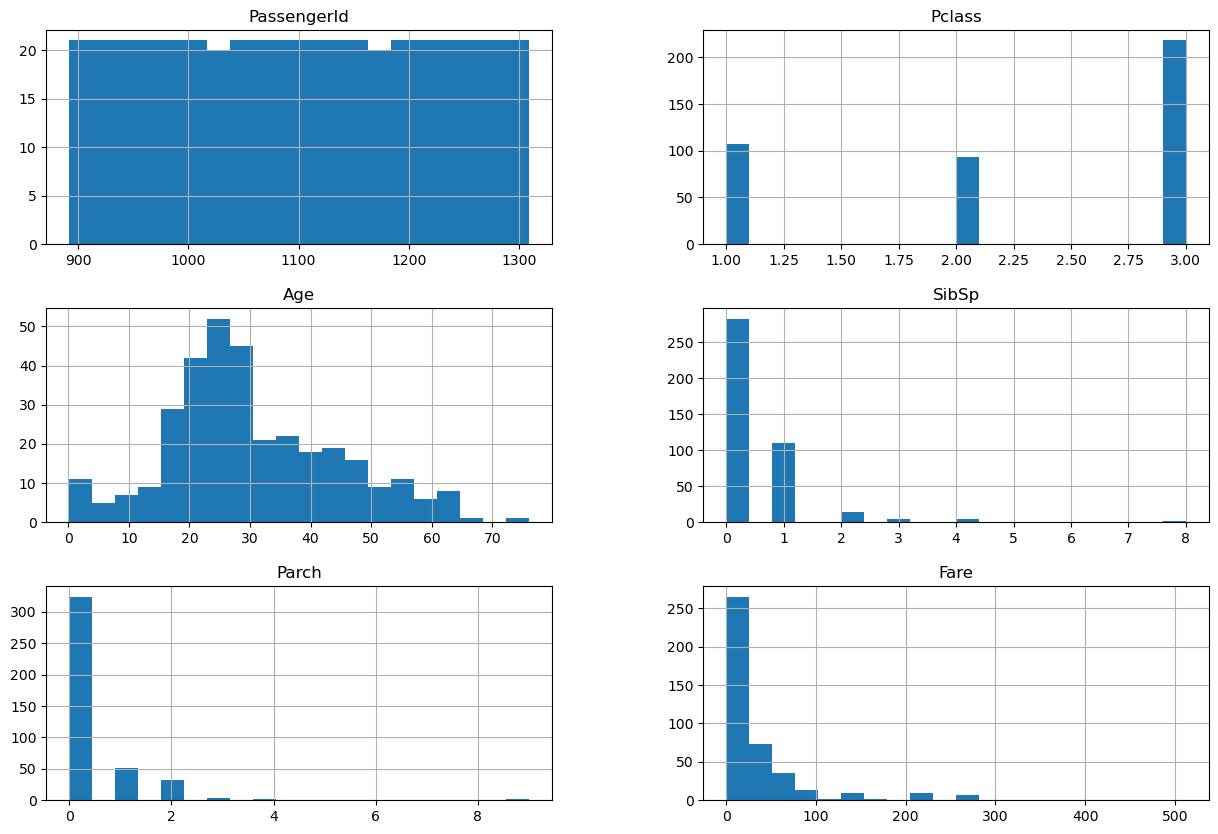

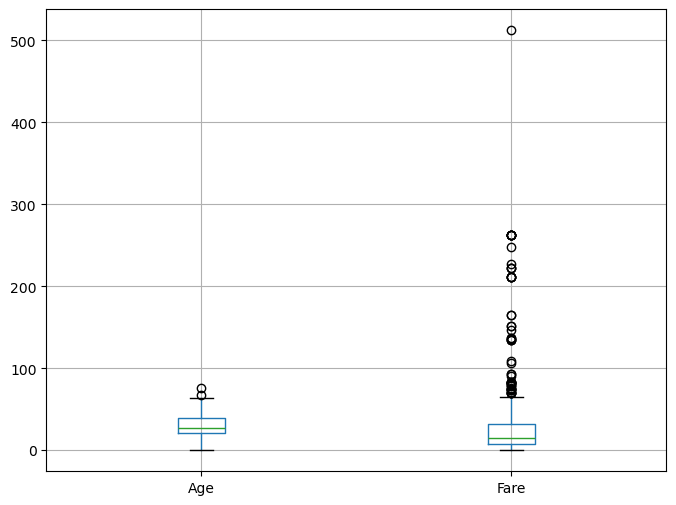

In [8]:
#EDA

import matplotlib.pyplot as plt
# Plot histograms of numerical features
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Plot box plots to see distribution and outliers
df[['Age', 'Fare']].boxplot(figsize=(8,6))
plt.show()

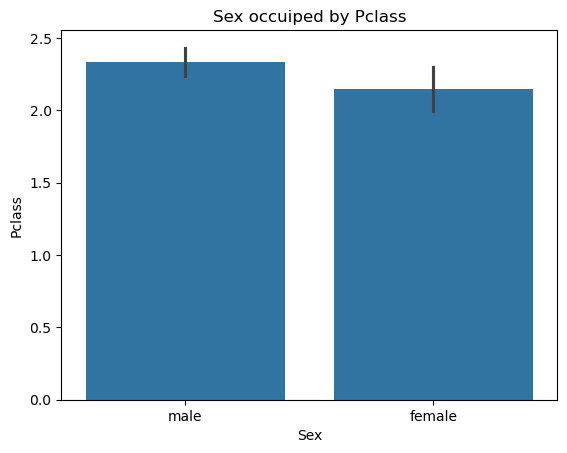

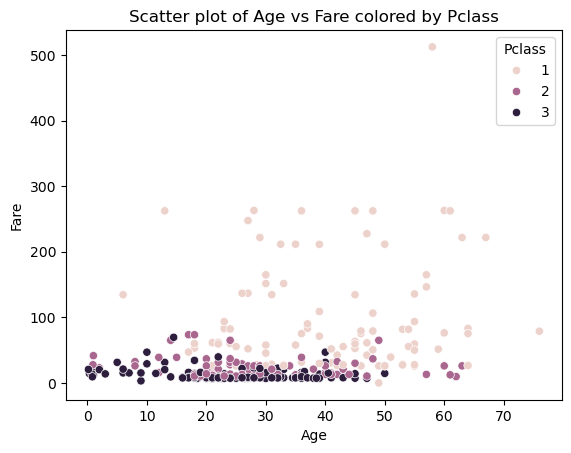

In [10]:
# Bar plot of survival rate by Sex
import seaborn as sns
sns.barplot(x='Sex', y='Pclass', data=df)
plt.title('Sex occuiped by Pclass')
plt.show()

# Scatter plot for Age vs Fare and color by Survival
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=df)
plt.title('Scatter plot of Age vs Fare colored by Pclass')
plt.show()


In [16]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [22]:
#Data Processing
#missing Values

df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer

# Impute missing 'Age' with the median value
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

# Impute missing 'Embarked' with the most frequent value
df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

df.drop(columns=['Cabin'], inplace=True)



In [34]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [37]:
print(df.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [41]:
# One-hot encode categorical features like 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked' ], drop_first=True)

# Drop irrelevant columns for modeling
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [87]:
#LGBM classification and hyperparameter  Tuning
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Sample data: Replace this with your actual dataset
# X: feature matrix, y: target variable (0 for negative class, 1 for positive class)
X = np.random.rand(712, 8)  # 712 samples, 8 features
y = np.array([0] * 444 + [1] * 268)  # 444 negative, 268 positive

# Split data into training and validation sets
X_test, X_valid, y_test, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

# Set the parameters for the model
params = {
    'boosting_type': 'gbdt',  # Use GBDT boosting
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,  # Adjust this based on your data
    'learning_rate': 0.05,
    'min_data_in_leaf': 10,  # Reduce this to allow more splits
    'scale_pos_weight': len(y_train) / (2 * np.sum(y_train)),  # Adjust for class imbalance
    'max_depth': -1,  # No limit on depth
    'verbose': -1,  # Suppress detailed output
}

# Train the model with early stopping
model = lgb.train(params, train_data, valid_sets=[valid_data], num_boost_round=100)

# Predict on validation set
y_pred = model.predict(X_valid)
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)  # Convert probabilities to binary outcomes

# Print classification report
print(classification_report(y_valid, y_pred_binary))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        89
           1       0.29      0.20      0.24        54

    accuracy                           0.51       143
   macro avg       0.44      0.45      0.44       143
weighted avg       0.48      0.51      0.49       143



In [89]:
import numpy as np
from collections import Counter

# Check the distribution of the target variable
print("Training class distribution:", Counter(y_train))
print("Validation class distribution:", Counter(y_valid))

Training class distribution: Counter({0: 355, 1: 214})
Validation class distribution: Counter({0: 89, 1: 54})


In [100]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

# Sample data: Replace this with your actual dataset
X = np.random.rand(712, 8)  # 712 samples, 8 features
y = np.array([0] * 444 + [1] * 268)  # 444 negative, 268 positive

# Split data into training and validation sets using stratified sampling
X_test, X_valid, y_test, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print class distribution
print("Training class distribution:", Counter(y_test))
print("Validation class distribution:", Counter(y_valid))

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_test, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Calculate scale_pos_weight
scale_pos_weight = len(y_test) / (2 * np.sum(y_test))
print("Scale positive weight:", scale_pos_weight)

# Set the parameters for the model
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',  # Evaluation metric
    'max_depth': 6,  # Adjust based on your data
    'learning_rate': 0.05,
    'subsample': 0.8,  # Randomly sample training data
    'colsample_bytree': 0.8,  # Randomly sample features
    'scale_pos_weight': scale_pos_weight,  # Adjust for class imbalance
    'verbosity': 0,  # Suppress detailed output
}

# Train the model with early stopping
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]  # Track training and validation metrics
model = xgb.train(params, dtrain, num_boost_round=100, evals=watchlist, early_stopping_rounds=10)

# Predict on validation set
y_pred_xgb = model.predict(dvalid)

# Adjust the threshold for binary classification
threshold = 0.3  # Change this value as needed
y_pred_binary = np.where(y_pred >= threshold, 1, 0)  # Convert probabilities to binary outcomes

# Print classification report with zero_division handling
print(classification_report(y_valid, y_pred_binary, zero_division=0))

Training class distribution: Counter({0: 355, 1: 214})
Validation class distribution: Counter({0: 89, 1: 54})
Scale positive weight: 1.3294392523364487
[0]	train-logloss:0.66284	eval-logloss:0.67252
[1]	train-logloss:0.65489	eval-logloss:0.67303
[2]	train-logloss:0.64390	eval-logloss:0.67172
[3]	train-logloss:0.63463	eval-logloss:0.67206
[4]	train-logloss:0.62466	eval-logloss:0.67163
[5]	train-logloss:0.61970	eval-logloss:0.67355
[6]	train-logloss:0.61259	eval-logloss:0.67639
[7]	train-logloss:0.60719	eval-logloss:0.67590
[8]	train-logloss:0.60034	eval-logloss:0.67706
[9]	train-logloss:0.59417	eval-logloss:0.67665
[10]	train-logloss:0.58679	eval-logloss:0.67749
[11]	train-logloss:0.57824	eval-logloss:0.67781
[12]	train-logloss:0.56942	eval-logloss:0.67611
[13]	train-logloss:0.56217	eval-logloss:0.67407
              precision    recall  f1-score   support

           0       0.71      0.19      0.30        89
           1       0.39      0.87      0.54        54

    accuracy          

In [102]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred_lgbm: {len(y_pred_lgbm)}")
print(f"Length of y_pred_xgb: {len(y_pred_xgb)}")


Length of y_test: 569
Length of y_pred_lgbm: 143
Length of y_pred_xgb: 143


In [118]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the LightGBM model (configure parameters as necessary)
model_lgbm = lgb.LGBMClassifier()  # You can specify parameters here if needed
model_xgb = xgb.XGBClassifier()
# Train the LightGBM model
model_lgbm.fit(X_test, y_test)
model_xgb.fit(X_test, y_test)
# Generate predictions using the trained model
y_pred_lgbm = model_lgbm.predict(X_test)


In [120]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Generate predictions (ensure it’s using class labels, not probabilities)
y_pred_lgbm = model_lgbm.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)

# Now you can evaluate both models
metrics_lgbm = evaluate_model(y_test, y_pred_lgbm)
metrics_xgb = evaluate_model(y_test, y_pred_xgb)

# Display results
print("LightGBM metrics:", metrics_lgbm)
print("XGBoost metrics:", metrics_xgb)


# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1
    
# Evaluate both models
metrics_lgbm = evaluate_model(y_test, y_pred_lgbm)
metrics_xgb = evaluate_model(y_test, y_pred_xgb)

# Display the results
print("LightGBM - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(*metrics_lgbm))
print("XGBoost  - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(*metrics_xgb))

LightGBM metrics: (1.0, 1.0, 1.0, 1.0)
XGBoost metrics: (1.0, 1.0, 1.0, 1.0)
LightGBM - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
XGBoost  - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


In [136]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Hyperparameter tuning using GridSearchCV for LightGBM
lgbm_param_grid = {
    'learning_rate': [0.01, 0.1, 0.05],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

grid_lgbm = GridSearchCV(estimator=LGBMClassifier(random_state=42), param_grid=lgbm_param_grid, 
                         scoring='accuracy', cv=5)
grid_lgbm.fit(X_test, y_test)

# Hyperparameter tuning using GridSearchCV for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.05],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

grid_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=xgb_param_grid, 
                        scoring='accuracy', cv=5)
grid_xgb.fit(X_test, y_test)

# Best parameters and accuracy from grid search
print("Best parameters for LightGBM:", grid_lgbm.best_params_)
print("Best parameters for XGBoost:", grid_xgb.best_params_)


Best parameters for LightGBM: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [133]:
#Comparitive Analysis
# Get the best models from grid search
best_lgbm = grid_lgbm.best_estimator_
best_xgb = grid_xgb.best_estimator_

# Predict on the test set with tuned models
y_pred_best_lgbm = best_lgbm.predict(X_test)
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the tuned models
metrics_best_lgbm = evaluate_model(y_test, y_pred_best_lgbm)
metrics_best_xgb = evaluate_model(y_test, y_pred_best_xgb)

# Display the comparison
print("Tuned LightGBM - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(*metrics_best_lgbm))
print("Tuned XGBoost  - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(*metrics_best_xgb))


Tuned LightGBM - Accuracy: 0.6239, Precision: 0.5000, Recall: 0.0047, F1-score: 0.0093
Tuned XGBoost  - Accuracy: 0.6221, Precision: 0.4000, Recall: 0.0093, F1-score: 0.0183
